# Discrete and Coninuous Random Variable

Each random variable follows a probability distribution, a function which describes it. The probability distribution assigns probabilities to all possible values of a random variable. For a given random variable $X$, we express the probability that $X$ is equal to a value $x$ as $P(X = x)$. 
1. For discrete random variables, we can express $p(x) = P(X = x)$ in shorthand. This is also known as the probability mass function (PMF). 
2. For continuous random variables we cannot use a PMF, as we will cover later, so we must use a probability density function (PDF). 

Probability distributions form the basis for the Black-Scholes and binomial pricing models as well as the CAPM. An understanding of them is also necessary in order to perform Monte Carlo simulations.

For each probability distribution function, we also have a cumulative distribution function (CDF). This is defined as $P(X \leq x)$, the probability that the random variable is less than or equal to a particular value. The shorthand for the CDF is $F(x) = P(X \leq x)$. 
1. In order to find $F(x)$ in the discrete case, we sum up the values of the PMF for all outcomes less than or equal to $x$. 
2. In the continuous case, we use calculus to integrate the PDF over all values up to $x$.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools
from __future__ import division

## 1. Discrete Random Variables

A discrete random variable is one with a countable number of outcomes. Each of these outcomes has a separate probability associated with it. Consider a coin flip or a die roll, some of the most basic uniformly distributed random variables. For the coin flip, there are two possible outcomes, either heads or tails, each with a $1/2$ probability of occurring. Discrete random variables do not always have equal weights for all outcomes. The basic unit of a discrete random variable is its probability mass function (PMF), another name for the probability function $p(x)$. The PMF, or probability function, gives a probability, a mass, to each point in the domain of the probability distribution. A probability function has two main properties:
1. $0 \leq p(x) \leq 1$ because all probabilities are in the interval $[0, 1]$
2. The sum of all probabilities $p(x)$ over all values of X is equal to $1$. The total weights for all values of the random variable must add to $1$.

In [17]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

### 1.1 Uniform Distribution

The most basic type of probability distribution is the uniform distribution. With a discrete uniform distribution, equal weight is assigned to all outcomes. Take the example of rolling a die. It has six faces, numbered $1$ through $6$, each equally likely to occur with a $1/6$ chance each. With this, we know the the PMF must be $p(x) = 1/6$ for all values of our uniform random variable $X$.

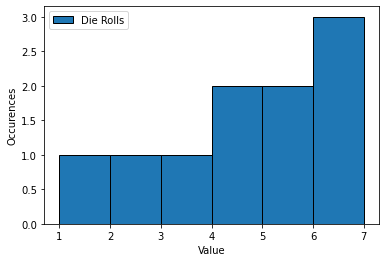

In [58]:
DieRolls = DiscreteRandomVariable(1,7)
plt.hist(DieRolls.draw(10), bins=[1,2,3,4,5,6,7], align='mid', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

Each time we roll the die, we have an equal chance of getting each face. In the short run this looks uneven, but if we take many samples it is apparent that each face is occurring the same percentage of rolls.

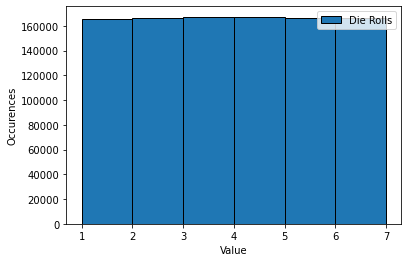

In [59]:
# Now we take 1000000 rolls:

plt.hist(DieRolls.draw(1000000), bins=[1,2,3,4,5,6,7], align='mid', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

So with a die roll, we can easily see illustrated that the $p(x) = 1/6$ for all values of the random variable $X$. 


Each value of the probability function is in the interval $[0,1]$, satisfying the first condition. The second condition is satisfied because all values of $p(x)$ sum to $1$, as evidenced in the cumulative distribution function. The demonstrates two properties of the cumulative distribution function:
1. The CDF is between $0$ and $1$ for all $x$. This parallels the value of the probability distribution function.
2. The CDF is nondecreasing in $x$. This means that as $x$ increases, the CDF either increases or remains constant.

### 1.2 Binomial Distribution

A binomial distribution is used to describe successes and failures. This can be very useful in an investment context as many of our choices tend to be binary like this. When we take a single success/failure trial, we call it a Bernoulli trial. With the Bernoulli random variable, we have two possible outcomes:

$$p(1) = P(Y = 1) = p \ \ \ \ \ \ \
p(0) = P(Y = 0) = 1-p$$
We consider $Y$ taking on a value of $1$ to be a success, so the probability of a success occurring in a single trial is $p$.

A binomial distribution takes a set of $n$ Bernoulli trials. As such, we can have somewhere between $0$ and $n$ successes. Each trial has the same probability of success, $p$, and all of the trials are independent of each other. We can describe the entire binomial random variable using only $n$ and $p$, signified by the notation $X$ ~ $B(n, p)$. This states that $X$ is a binomial random variable with parameters $n$ and $p$.

In order to define the probability function of a binomial random variable, we must be able to choose some number of successes out of the total number of trials. This idea lends itself easily to the combination idea in combinatorics. A combination describes all possible ways of selecting items out of a collection such that order does not matter. For example, if we have $6$ pairs of socks and we want to choose $2$ of them, we would write the total number of combinations possible as $\binom{6}{2}$. This is expanded as:

$$
\binom{6}{2} = \frac{6!}{4! \ 2!} = 15
$$
Where $!$ denotes factorial and $n! = (n)(n-1)(n-2)\ldots (1)$. In order to write the formula for a combination more generally, we write:

$$
\binom{n}{x} = \frac{n!}{(n-x)! \ x!}
$$
We use this notation in order to choose successes with our binomial random variable. The combination serves the purpose of computing how many different ways we can reach the same result. The resulting probability function is:

$$
p(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x} = \frac{n!}{(n-x)! \ x!} p^x(1-p)^{n-x}
$$
If $X$ is a binomial random variable distributed with $B(n, p)$.

In [60]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

Take the example of a stock price moving up or down, each with probability $p = 0.5$. 
1. We can consider a move up, or $U$, to be a success and a move down, or 
2. $D$ to be a failure. 

With this, we can analyze the probability of each event using a binomial random variable. We will also consider an $n$-value of $5$ for $5$ observations of the stock price over time. The following table shows the probability of each event:

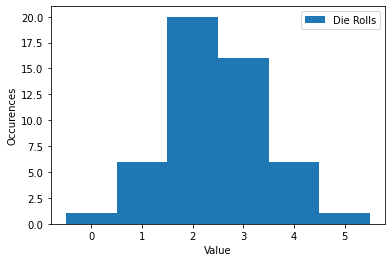

In [61]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
plt.hist(StockProbabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

Again, as in all cases of sampling, the more samples that you take, the more consistent your resulting distribution looks:

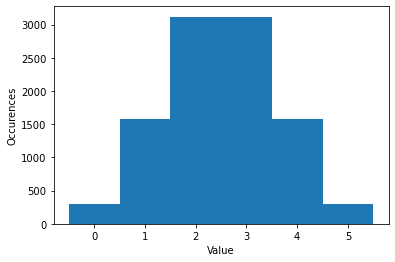

In [62]:
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

Say that we changed our parameters so that $p = 0.25$. This makes it so that $P(X = 0) = 0.23730$, skewing our distribution much more towards lower values. We can see this easily in the following graph:

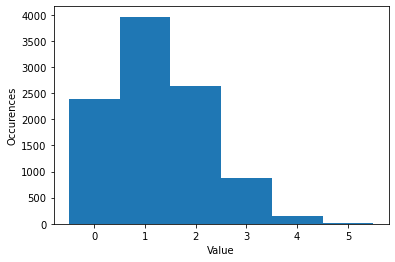

In [64]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

Changing the value of $p$ from $0.50$ to $0.25$ clearly makes our distribution asymmetric. We can extend this idea of stock price moving with a binomial random variable into a framework that we call the <b>Binomial Model of Stock Price Movement</b>. This is used as one of the foundations for option pricing. In the Binomial Model, it is assumed that for any given time period a stock price can move up or down by a value determined by the up or down probabilities. This turns the stock price into the function of a binomial random variable, the magnitude of upward or downward movement, and the initial stock price. We can vary these parameters in order to approximate different stock price distributions.

## 2. Continuous Random Variables

Continuous random variables differ from discrete random variables in that continuous ones can take infinitely many outcomes. They cannot be counted or described as a list. As such, it means very little when we assign individual probabilities to outcomes. Because there are infinitely many outcomes, the probability of hitting any individual outcome has a probability of 0.

We can resolve this issue by instead taking probabilities across ranges of outcomes. This is managed by using calculus, though in order to use our sampling techniques here we do not actually have to use any. With a continuous random variable $P(X = 0)$ is meaningless. Instead we would look for something more like $P(-1 &lt; X &lt; 1)$. For continous random variables, rather than using a PMF, we define a probability density function (PDF), $f_X(x)$, such that we can say:$$P(a &lt; X &lt; b) = \int_a^b f_X(x)dx$$

Similar to our requirement for discrete distributions that all probabilities add to $1$, here we require that:

1. $f_X(x) \geq 0$ for all values of $X$
2. $P(-\infty < X < \infty) = \int_{-\infty}^{\infty} f_X(x) dx = 1$

It is worth noting that because the probability at an individual point with a continuous distribution is $0$, the probabilities at the endpoints of a range are $0$. Hence, $P(a \leq X \leq b) = P(a < X \leq b) = P(a \leq X < B) = P(a < X < b)$. If we integrate the PDF across all possibilities, over the total possible range, the value should be $1$.

In [66]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

### 2.1 Uniform Distribution

The uniform distribution can also be defined within the framework of a continous random variable. We take $a$ and $b$ to be constant, where $b$ is the highest possible value and $a$ is the lowest possible value that the outcome can obtain. Then the PDF of a uniform random variable is:

$$f(x) = \begin{cases}\frac{1}{b - a} \text for a<x<b; \text{otherwise}\end{cases}$$
Since this function is defined on a continuous interval, the PDF covers all values between $a$ and $b$. Here we have a plot of the PDF (feel free to vary the values of $a$ and $b$):

Text(0.5, 0, 'Value')

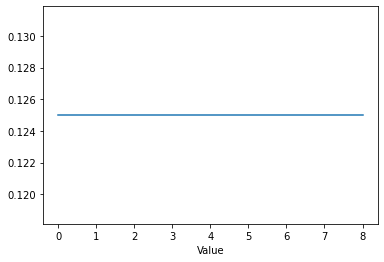

In [68]:
a = 0.0
b = 8.0
x = np.linspace(a, b, 100)
y = [1/(b-a) for i in x]
plt.plot(x, y)
plt.xlabel('Value')

As before in the discrete uniform case, the continuous uniform distribution PDF is constant for all values the variable can take on. The only difference here is that we cannot take the probability for any individual point.

### 2.2 Normal  Distribution

The normal distribution is a very common and important distribution in statistics. Many important tests and methods in statistics, and by extension, finance, are based on the assumption of normality. A large part of this is due to the results of the Central Limit Theorem (CLT), which states that large enough samples of independent trials are normally distributed. The convenience of the normal distribution finds its way into certain algorithmic trading strategies as well. For example, as covered in the pairs trading notebook, we can search for stock pairs that are cointegrated, and bet on the direction the spread between them will change based on a normal distribution.

In [69]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean=0, variance=1):
        self.variableType = 'Normal'
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

The PDF of a normal random variable is:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
And is defined for $-\infty &lt; x &lt; \infty$. When we have $\mu = 0$ and $\sigma = 1$, we call this the standard normal distribution.

Text(0, 0.5, 'Probability')

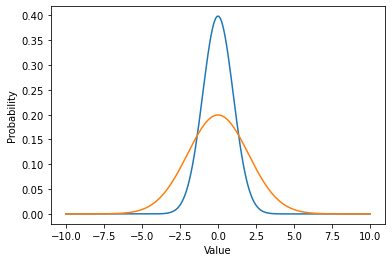

In [91]:
# Graph 1:
mu_1 = 0
sigma_1 = 1

# Graph 2:
mu_2 = 0
sigma_2 = 2

x = np.linspace(-10, 10, 200)
y1 = (1/(np.sqrt(2*np.pi)*(sigma_1))) * np.exp(-(x-mu_1)**2/(2*sigma_1**2))
y2 = (1/(np.sqrt(2*np.pi)*(sigma_2))) * np.exp(-(x-mu_2)**2/(2*sigma_2**2))

plt.plot(x,y1,x,y2)


plt.xlabel("Value")
plt.ylabel('Probability')

By changing the mean and standard deviation of the normal distribution, we can change the depth and width of the bell curve. With a larger standard deviation, the values of the distribution are less concentrated around the mean.

Rather than using normal distribution to model stock prices, we use it to model returns. Stock prices cannot go below $0$ while the normal distribution can take on all values on the real line, making it better suited to returns. Given the mean and variance of a normal distribution, we can make the following statements:
1. Around $68\%$ of all observations fall within one standard deviations around the mean ($\mu \pm \sigma$)
2. Around $95\%$ of all observations fall within two standard deviations around the mean ($\mu \pm 2\sigma$)
3. Around $99\%$ of all observations fall within three standard deviations aroud the mean ($\mu \pm 3\sigma$)

These values are important for understanding confidence intervals as they relate to the normal distribution. When considering the mean and variance of a sample distribution, we like to look at different confidence intervals around the mean.

Using the central limit theorem, we can standardize different random variables so that they become normal random variables. A very common tool in statistics is a standard normal probability table, used for looking up the values of the standard normal CDF for given values of $x$. By changing random variables into a standard normal we can simply check these tables for probability values. We standardize a random variable $X$ by subtracting the mean and dividing by the variance, resulting in the standard normal random variable $Z$.

$$
Z = \frac{X - \mu}{\sigma}
$$
Let's look at the case where $X$ ~ $B(n, p)$ is a binomial random variable. In the case of a binomial random variable, the mean is $\mu = np$ and the variance is $\sigma^2 = np(1 - p)$.

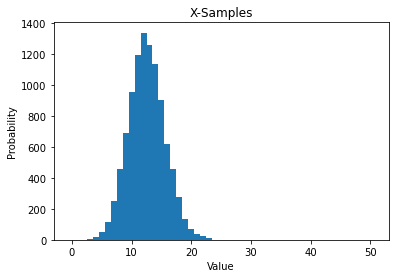

In [94]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - (n*p)) / np.sqrt(n* p*(1 - p))

plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.title("X-Samples")
plt.ylabel('Probability');

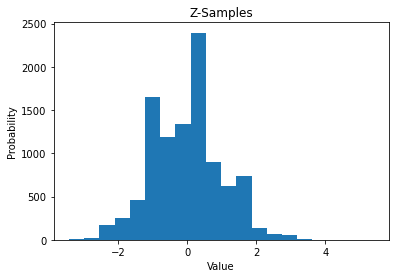

In [95]:
plt.hist(Z_samples, bins=20)
plt.xlabel('Value')
plt.title("Z-Samples")
plt.ylabel('Probability');

The idea that we can standardize random variables is very important. By changing a random variable to a distribution that we are more familiar with, the standard normal distribution, we can easily answer any probability questions that we have about the original variable. This is dependent, however, on having a large enough sample size.

Let's assume that stock returns are normally distributed. Say that $Y$ is the price of a stock. We will simulate its returns and plot it.



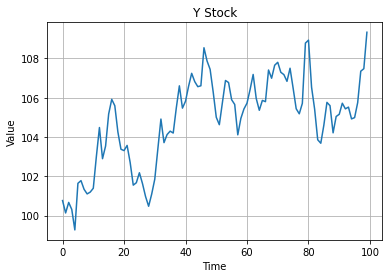

In [128]:
Y_initial = 100
Y_returns = NormalRandomVariable(0, 1).draw(100) # generate 100 daily returns from a random normal distribution spread between 0 to 1
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.grid()
plt.title("Y Stock")
plt.xlabel('Time')
plt.ylabel('Value');

Say that we have some other stock, $Z$, and that we have a portfolio of $Y$ and $Z$, called $W$.

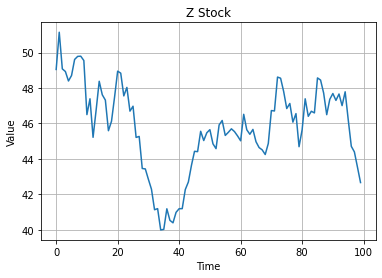

In [129]:
Z_initial = 50
Z_returns = NormalRandomVariable(0, 1).draw(100) # generate 50 daily returns from a random normal distribution spread between 0 to 1
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.grid()
plt.title("Z Stock")
plt.xlabel('Time')
plt.ylabel('Value');

We construct $W$ by taking a weighted average of $Y$ and $Z$ based on their quantity.

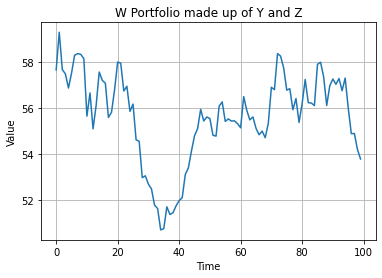

In [130]:
# First let us take 20 stocks of Y and 100 stocks of Z:
Y_quantity = 20
Z_quantity = 100
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.grid()
plt.title("W Portfolio made up of Y and Z")
plt.xlabel('Time')
plt.ylabel('Value');

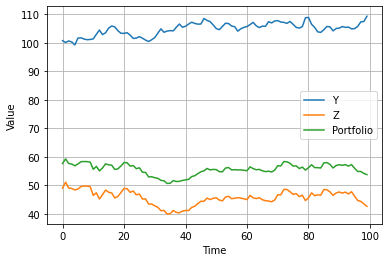

In [131]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Value');

Now, as $Y\_returns$ were picked up from a normal distribution and so was $Z\_returns$. Hence, W_returns of the portfolio W made up of Y and Z will also show normal distribution!

Text(0, 0.5, 'Occurrences')

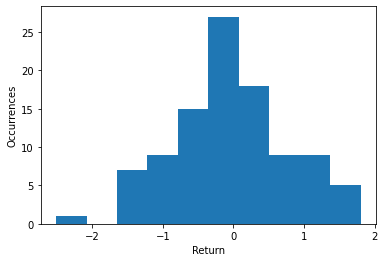

In [133]:
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences')

The normal distribution is very widely utilized in finance especially in risk and portfolio theory. Extensive literature can be found utilizing the normal distribution for purposes ranging from risk analysis to stock price modeling.

## Fitting a Distribution

Now we will attempt to fit a probability distribution to the returns of a stock. We will take the returns of Tesla and try to fit a normal distribution to them. The first thing to check is whether the returns actually exhibit properties of a normal distribution. For this purpose, we will use the Jarque-Bera test, which indicates non-normality if the p-value is below a cutoff.

In [136]:
# Let us pull the data for TSLA first:
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2015,1,1)
end = dt.datetime(2016,1,1)
prices = web.DataReader('TSLA', "yahoo", start, end)['Adj Close']

In [137]:
# Now let us get the returns:
returns = prices.pct_change()[1:]

In [138]:
# Set a significance level of 10%:
cutoff = 0.01

The Jarque-Bera test p-value is 2.8549268500043003e-12
We reject the Null Hypothesis (Returns are notmally distributed) if 2.8549268500043003e-12 < 0.01
The Skewness of the returns is 0.20475496729374978
The Kurtosis of the returns is 5.217139411732519


Text(0.5, 1.0, 'Distribution of Returns of TSLA during the period 1-12015 to 1-1-2016')

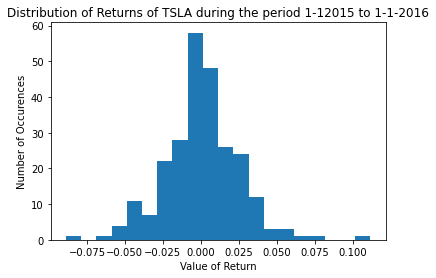

In [140]:
# Using Jarque-Bera Test, we will check how normal is the data:
a, p_value, skewness, kurtosis = stattools.jarque_bera(returns)
print(f"The Jarque-Bera test p-value is {p_value}")
print(f"We reject the Null Hypothesis (Returns are notmally distributed) if {p_value} < {cutoff}")
print(f"The Skewness of the returns is {skewness}")
print(f"The Kurtosis of the returns is {kurtosis}")

# Let us also plot the returns and see how is it distributed:
plt.hist(returns, bins=20)
plt.xlabel("Value of Return")
plt.ylabel("Number of Occurences")
plt.title("Distribution of Returns of TSLA during the period 1-12015 to 1-1-2016")

The low p-value of the JB test leads us to reject the null hypothesis that the returns are normally distributed. This is due to the high kurtosis (normal distributions have a kurtosis of $3$).

We will proceed from here assuming that the returns are normally distributed so that we can go through the steps of fitting a distribution. Next we calculate the sample mean and standard deviation of the series.

In [142]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

Now let's see how a theoretical normal curve fits against the actual values.

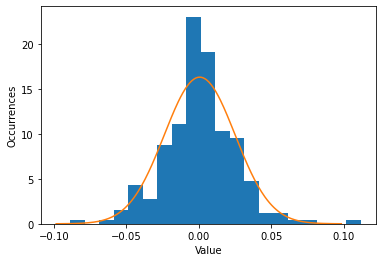

In [144]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns, bins = 20, density = True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');

Our theoretical curve for the returns has a substantially lower peak than the actual values, which makes sense because the returns are not actually normally distributed. This is again due to the kurtosis of the normal distribution. The returns have a kurtosis value of around $5.20$, while the kurtosis of the normal distribution is $3$. A higher kurtosis leads to a higher peak. A major reason why it is so difficult to model prices and returns is due to the underlying probability distributions. A lot of theories and frameworks in finance require that data be somehow related to the normal distribution. This is a major reason for why the normal distribution seems to be so prevalent. For example, the basis of the Black-Scholes pricing model for options assumes that stock prices are log-normally distributed. However, it is exceedingly difficult to find real-world data that fits nicely into the assumptions of normality. When actually implementing a strategy, you should not assume that data follows a distribution that it demonstrably does not unless there is a very good reason for it.

Generally, when trying to fit a probability distribution to real-world values, we should have a particular distribution (or distributions) in mind. There are a variety of tests for different distributions that we can apply to see what might be the best fit. In additon, as more information becomes available, it will become necessary to update the sample mean and standard deviation or maybe even to find a different distribution to more accurately reflect the new information. The shape of the distribution will change accordingly.